In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [55]:
def diagnostic_plots(df, variable):
  plt.figure(figsize=(15,6))
  # гистограмма
  plt.subplot(1, 2, 1)
  df[variable].hist(bins=30)
  ## Q-Q plot
  plt.subplot(1, 2, 2)
  stats.probplot(df[variable], dist="norm", plot=plt)
  plt.show()

Заполнение пустых значений

In [56]:
!wget  https://raw.githubusercontent.com/thisismetis/datasets/main/heroes_information.csv
data = pd.read_csv('heroes_information.csv', sep=",")
data.head()

--2023-05-02 10:37:09--  https://raw.githubusercontent.com/thisismetis/datasets/main/heroes_information.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49195 (48K) [text/plain]
Saving to: ‘heroes_information.csv.2’

heroes_information. 100%[===================>]  48.04K  --.-KB/s    in 0.007s  

2023-05-02 10:37:09 (6.62 MB/s) - ‘heroes_information.csv.2’ saved [49195/49195]



,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [57]:
data.isnull().sum()

Unnamed: 0     0
name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

In [58]:
imputer = SimpleImputer(missing_values=np.nan, strategy="constant", fill_value = "Unknown")
nullFixedData = pd.DataFrame(data = imputer.fit_transform(data), columns=data.columns)
nullFixedData.isnull().sum()

Unnamed: 0    0
name          0
Gender        0
Eye color     0
Race          0
Hair color    0
Height        0
Publisher     0
Skin color    0
Alignment     0
Weight        0
dtype: int64

Кодирование категориальных признаков

In [59]:
!wget  https://raw.githubusercontent.com/azar-s91/dataset/master/BankChurners.csv
data = pd.read_csv('BankChurners.csv', sep=",")
data.head()

--2023-05-02 10:37:09--  https://raw.githubusercontent.com/azar-s91/dataset/master/BankChurners.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1210878 (1.2M) [text/plain]
Saving to: ‘BankChurners.csv.5’

BankChurners.csv.5  100%[===================>]   1.15M  --.-KB/s    in 0.04s   

2023-05-02 10:37:09 (30.1 MB/s) - ‘BankChurners.csv.5’ saved [1210878/1210878]



,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [60]:
labelEnc = LabelEncoder()
for column in data.columns:
  if data[column].dtype not in ['float', 'int']:
    data[[column]] = pd.DataFrame(labelEnc.fit_transform(data[column].astype(str)), columns=[column])
data.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,1,45,1,3,3,1,2,0,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,1,49,0,5,2,2,4,0,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,1,51,1,3,2,1,3,0,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,1,40,0,4,3,3,4,0,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,1,40,1,3,5,1,2,0,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,713061558,1,44,1,2,2,1,1,0,36,...,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,810347208,1,51,1,4,6,1,0,1,46,...,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,818906208,1,32,1,0,3,3,2,3,27,...,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
8,710930508,1,37,1,3,5,2,2,0,36,...,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,719661558,1,48,1,2,2,2,3,0,36,...,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


Нормализация числовых признаков

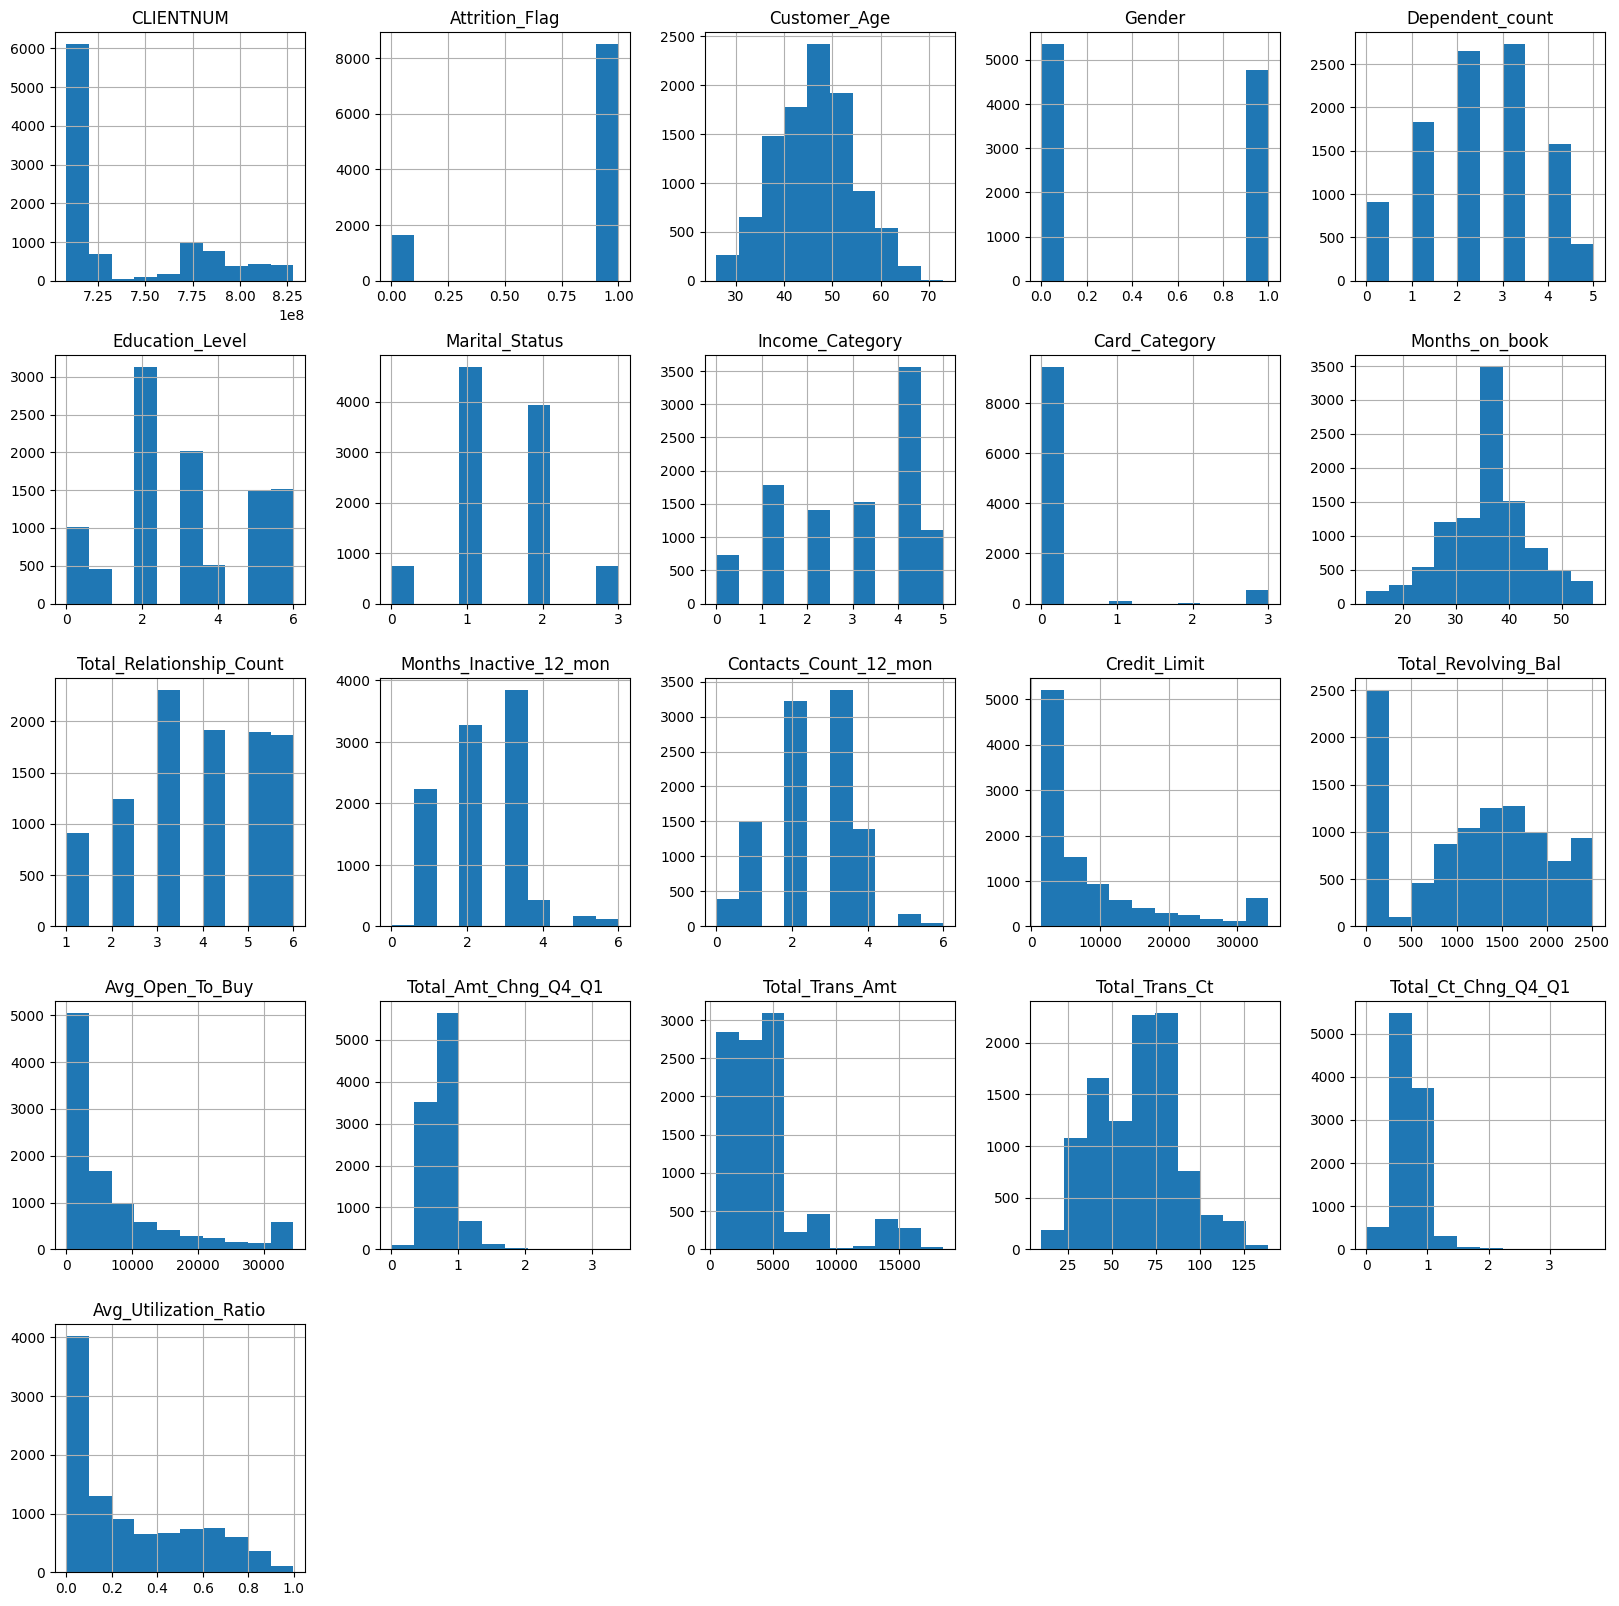

In [61]:
data.hist(figsize=(20,20))
plt.show()

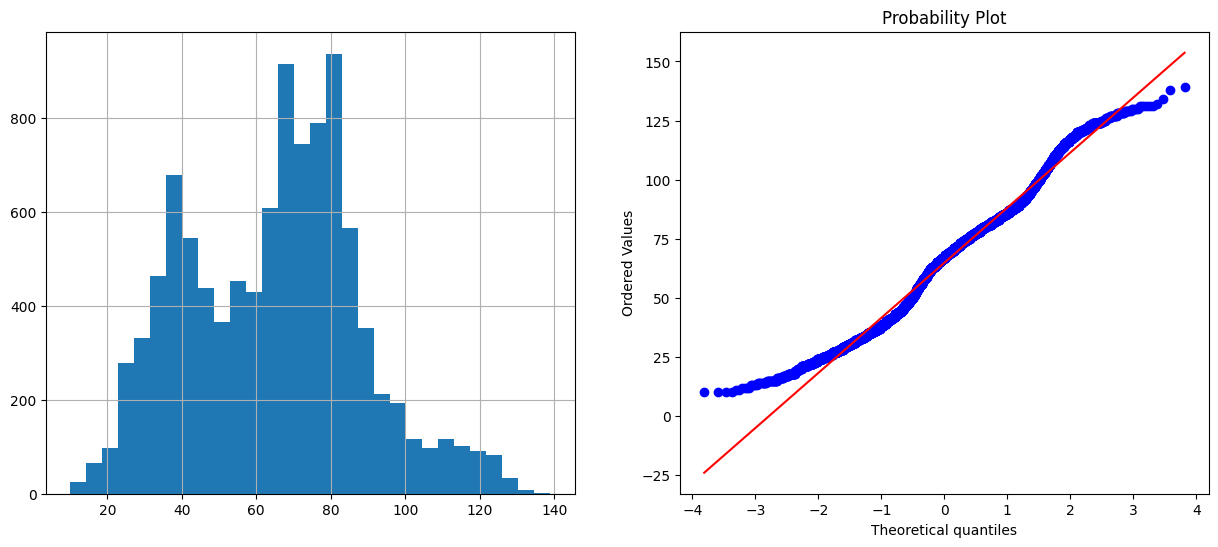

In [62]:
diagnostic_plots(data, 'Total_Trans_Ct')

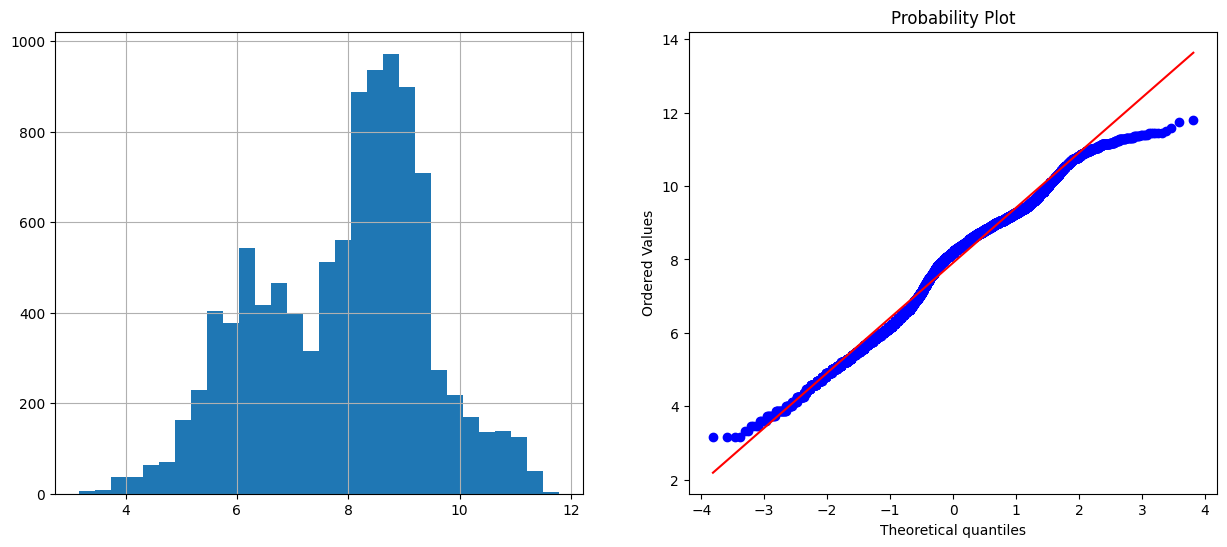

In [63]:
data['Total_Trans_Ct_sqrt'] = data['Total_Trans_Ct']**(1/2)
diagnostic_plots(data, 'Total_Trans_Ct_sqrt')